<a href="https://colab.research.google.com/github/RaqFern/Python_para_financas/blob/main/visualiza%C3%A7%C3%A3o_de_dados_financeiros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python para finanças - visualização de dados financeiros I

# Trabalhando com dados de apenas uma ação


In [ ]:
!pip install -q yfinance

     |████████████████████████████████| 62 kB 1.1 MB/s 
     |████████████████████████████████| 6.4 MB 11.3 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


Importando bibliotecas

In [ ]:
import pandas as pd 
import numpy as np
from pandas_datareader import data #função p/ carregar dados financeiros online
import matplotlib.pyplot as plt
import seaborn as sns #dataviz
import plotly.express as px # p/ gerar graficos interativos
import yfinance as yf

Carregando a base de dados

In [ ]:
#gol_df = data.DataReader(name = 'GOLL4.SA', data_source='yahoo', start='2015-01-01')
gol_df = yf.download("GOLL4.SA", start='2015-01-01')

[*********************100%***********************]  1 of 1 completed


In [ ]:
gol_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,14.97,15.20,14.61,14.99,14.99,901900
2015-01-05,14.90,15.01,14.41,14.85,14.85,1272500
2015-01-06,14.75,15.21,14.65,15.21,15.21,2183500
2015-01-07,15.15,15.33,14.55,14.55,14.55,1846900
2015-01-08,14.41,14.65,14.20,14.27,14.27,1569500
...,...,...,...,...,...,...
2022-06-20,10.40,10.53,9.78,10.04,10.04,7968800
2022-06-21,10.34,10.37,9.80,9.90,9.90,9156200
2022-06-22,9.64,10.26,9.64,9.81,9.81,9439500


Descrição das colunas:

*   Open: preço de negociação na abertura da bolsa

*   High: preço de negociação máximo do diaElemento de lista

*   Low:  preço de negociação mínimo do dia

*   Close:preço de negociação no fechamento da bolsa

*    Adj Close: fechamento ajustado (preço real do fechamento)

*    Volume: Volume de negociação no dia






In [ ]:
gol_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1858 entries, 2015-01-02 to 2022-06-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1858 non-null   float64
 1   High       1858 non-null   float64
 2   Low        1858 non-null   float64
 3   Close      1858 non-null   float64
 4   Adj Close  1858 non-null   float64
 5   Volume     1858 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 101.6 KB


In [ ]:
gol_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1858.000000,1858.000000,1858.000000,1858.000000,1858.000000,1.858000e+03
mean,15.785592,16.169822,15.377853,15.744763,15.744763,5.169079e+06
std,9.502594,9.677588,9.320382,9.496286,9.496286,4.731666e+06
min,1.160000,1.180000,1.130000,1.160000,1.160000,0.000000e+00
25%,7.880000,8.052500,7.702500,7.852500,7.852500,2.060225e+06
50%,14.825000,15.150000,14.430000,14.800000,14.800000,3.780150e+06
75%,21.577500,22.095000,21.100000,21.570000,21.570000,6.585075e+06
max,43.669998,44.619999,41.310001,43.790001,43.790001,4.368050e+07


* Média
* Desvio padrão
* Valor mínimo
* 25% da base de dados (1º quartil)
* 50% da base de dados (mediana/2º quartil)
* 75% da base de dados (3º quartil)
* Valor máximo

In [ ]:
#buscando a data em que se teve o valor mais alto de fechamento (identificado 
#acima como 43.79)

gol_df[gol_df['Close'] >= 43.79]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-08-01,41.25,44.619999,41.25,43.790001,43.790001,6664200


In [ ]:
#buscando a data em que se teve o menor valor de fechamento (identificado 
#acima como 43.79)

gol_df[(gol_df['Close'] >= 1.15)

SyntaxError: ignored

In [ ]:
# O erro apresentado pode estar relacionado ao nº de casas decimais, para contorná-lo
# acrescentaremos um intervalo
gol_df[(gol_df['Close'] >= 1.15) & (gol_df['Close'] <= 1.16)]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-22,1.2,1.26,1.14,1.16,1.16,3830600


In [ ]:
#salvando o arquivo em .csv
gol_df.to_csv('gol.csv')

#dessa forma teremos sempre o arquivo disponível, com os dados conforme 
#trabalhados nesse notebook

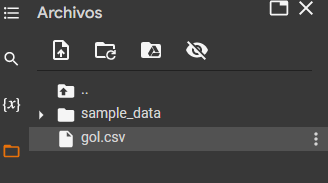

In [ ]:
gol_df2 = pd.read_csv('/content/gol.csv')
gol_df2

#Ao salvar em .csv é possivel observar que o índice "Date" foi transformado em 
#um atributo, coluna.

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,14.97,15.20,14.61,14.99,14.99,901900
1,2015-01-05,14.90,15.01,14.41,14.85,14.85,1272500
2,2015-01-06,14.75,15.21,14.65,15.21,15.21,2183500
3,2015-01-07,15.15,15.33,14.55,14.55,14.55,1846900
4,2015-01-08,14.41,14.65,14.20,14.27,14.27,1569500
...,...,...,...,...,...,...,...
1853,2022-06-20,10.40,10.53,9.78,10.04,10.04,7968800
1854,2022-06-21,10.34,10.37,9.80,9.90,9.90,9156200
1855,2022-06-22,9.64,10.26,9.64,9.81,9.81,9439500
1856,2022-06-23,9.92,10.06,9.74,9.84,9.84,7608800


# Trabalhando com dados de múltiplas ações

In [ ]:
acoes = ['GOLL4.SA', 'CVCB3.SA', 'WEGE3.SA', 'MGLU3.SA', 'TOTS3.SA', 'BOVA11.SA']
# nomes das ações inseridos conforme identificados em https://br.financas.yahoo.com/
# incluido o BOVA11 para comparação pois é um bom indicador de desempenho de uma ação


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
acoes_df = pd.DataFrame()
for acao in acoes:
  #acoes_df[acao] = data.DataReader(acao, data_source='yahoo', start='2015-01-01')['Close']
  acoes_df[acao] = yf.download(acao, start='2015-01-01')['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
acoes_df

,GOLL4.SA,CVCB3.SA,WEGE3.SA,MGLU3.SA,TOTS3.SA,BOVA11.SA
Date,,,,,,
2015-01-02,14.99,15.20,5.923076,0.232812,11.910702,47.259998
2015-01-05,14.85,15.00,5.963461,0.237187,11.544731,46.320000
2015-01-06,15.21,14.80,5.875000,0.234062,10.822770,46.580002
2015-01-07,14.55,14.67,5.807692,0.241875,10.746248,48.150002
2015-01-08,14.27,14.15,5.905769,0.240000,10.995774,48.509998
...,...,...,...,...,...,...
2022-06-20,10.04,9.46,24.100000,2.580000,23.200001,96.290001
2022-06-21,9.90,9.40,25.299999,2.510000,24.030001,96.400002
2022-06-22,9.81,9.06,25.790001,2.440000,23.760000,96.029999
